In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.0 MB/s eta 0:00:00


In [ ]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Define domain
temp=np.arange(0,40.01,0.01)
wind=np.arange(0,14.01,0.01)
atm=np.arange(28,32.01,0.01)
rate=np.arange(0,1.001,0.001)
rain=np.arange(0,100.01,0.01)

In [ ]:
#Membership functions
temp_vl=fuzz.trapmf(temp,[0,0,15,20])
temp_l=fuzz.trimf(temp,[15,20,25])
temp_n=fuzz.trimf(temp,[20,25,30])
temp_h=fuzz.trimf(temp,[25,30,35])
temp_vh=fuzz.trapmf(temp,[30,35,40,40])
wind_vl=fuzz.trapmf(wind,[0,0,2,4])
wind_l=fuzz.trimf(wind,[2,4,6])
wind_n=fuzz.trimf(wind,[4,6,8])
wind_h=fuzz.trimf(wind,[6,8,10])
wind_vh=fuzz.trapmf(wind,[8,10,14,14])
atm_l=fuzz.trapmf(atm,[28,28,29.8,30])
atm_n=fuzz.trimf(atm,[29.8,30,30.2])
atm_h=fuzz.trapmf(atm,[30,30.2,32,32])
rate_s=fuzz.trapmf(rate,[0,0,0.003,0.005])
rate_sc=fuzz.trapmf(rate,[0.003,0.005,0.04,0.18])
rate_rc=fuzz.trapmf(rate,[0.04,0.18,1,1])
rain_vl=fuzz.trimf(rain,[0,10,30])
rain_l=fuzz.trimf(rain,[10,30,50])
rain_n=fuzz.trimf(rain,[30,50,70])
rain_h=fuzz.trimf(rain,[50,70,90])
rain_vh=fuzz.trimf(rain,[70,90,100])

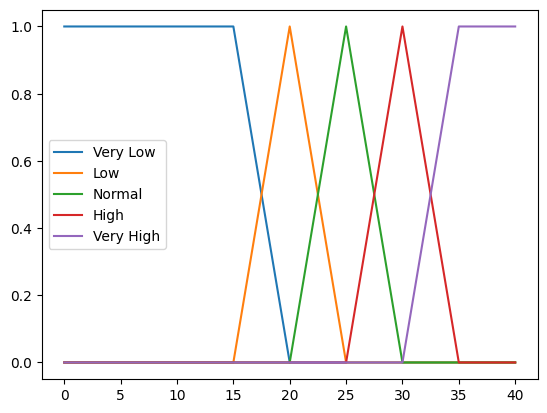

In [ ]:
#Visualization of membership functions
plt.plot(temp,temp_vl,temp,temp_l,temp,temp_n,temp,temp_h,temp,temp_vh)
plt.legend(["Very Low", "Low", "Normal", "High", "Very High"])

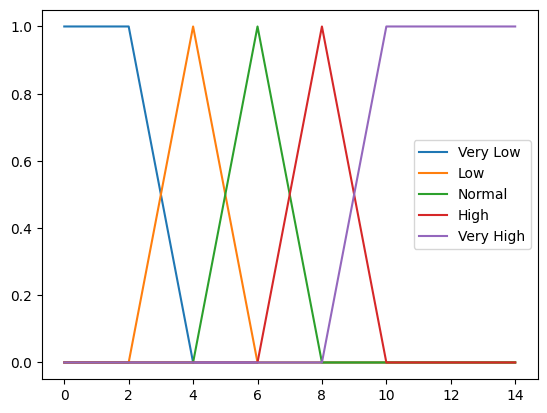

In [ ]:
plt.plot(wind,wind_vl,wind,wind_l,wind,wind_n,wind,wind_h,wind,wind_vh)
plt.legend(["Very Low", "Low", "Normal", "High", "Very High"])

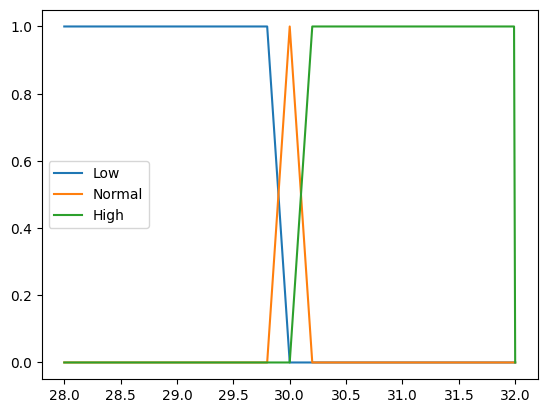

In [ ]:
plt.plot(atm,atm_l,atm,atm_n,atm,atm_h)
plt.legend(["Low", "Normal", "High"])

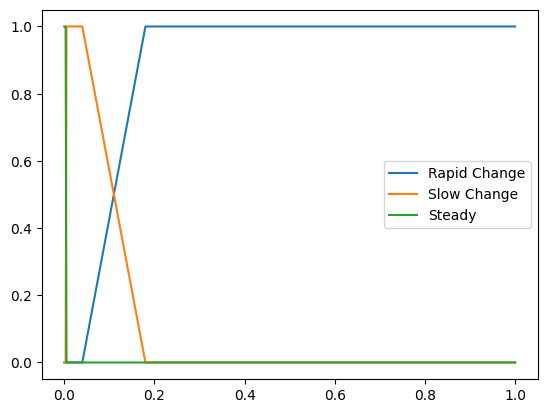

In [ ]:
plt.plot(rate,rate_rc,rate,rate_sc,rate,rate_s)
plt.legend(["Rapid Change", "Slow Change", "Steady"])

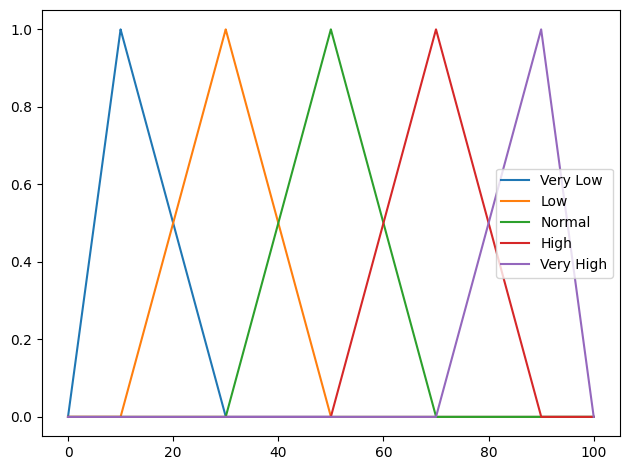

In [ ]:
plt.plot(rain,rain_vl,rain,rain_l,rain,rain_n,rain,rain_h,rain,rain_vh)
plt.legend(["Very Low", "Low", "Normal", "High", "Very High"])
plt.tight_layout()

In [ ]:
def fuzzification(input_temp, input_wind, input_atm, input_rate):
  temp_is_vl=fuzz.interp_membership(temp,temp_vl,input_temp) #domain, membership function, value
  temp_is_l=fuzz.interp_membership(temp,temp_l,input_temp)
  temp_is_n=fuzz.interp_membership(temp,temp_n,input_temp)
  temp_is_h=fuzz.interp_membership(temp,temp_h,input_temp)
  temp_is_vh=fuzz.interp_membership(temp,temp_vh,input_temp)
  wind_is_vl=fuzz.interp_membership(wind,wind_vl,input_wind)
  wind_is_l=fuzz.interp_membership(wind,wind_l,input_wind)
  wind_is_n=fuzz.interp_membership(wind,wind_n,input_wind)
  wind_is_h=fuzz.interp_membership(wind,wind_h,input_wind)
  wind_is_vh=fuzz.interp_membership(wind,wind_vh,input_wind)
  atm_is_l=fuzz.interp_membership(atm,atm_l,input_atm)
  atm_is_n=fuzz.interp_membership(atm,atm_n,input_atm)
  atm_is_h=fuzz.interp_membership(atm,atm_h,input_atm)
  rate_is_s=fuzz.interp_membership(rate,rate_s,input_rate)
  rate_is_sc=fuzz.interp_membership(rate,rate_sc,input_rate)
  rate_is_rc=fuzz.interp_membership(rate,rate_rc,input_rate)
  temp_arr=[temp_is_vl,temp_is_l,temp_is_n,temp_is_h,temp_is_vh]
  wind_arr=[wind_is_vl,wind_is_l,wind_is_n,wind_is_h,wind_is_vh]
  atm_arr=[atm_is_l,atm_is_n,atm_is_h]
  rate_arr=[rate_is_s,rate_is_sc,rate_is_rc]
  return temp_arr,wind_arr,atm_arr,rate_arr

In [ ]:
def inference_engine(temp_arr,wind_arr,atm_arr,rate_arr):
  temp_is_vl,temp_is_l,temp_is_n,temp_is_h,temp_is_vh=temp_arr
  wind_is_vl,wind_is_l,wind_is_n,wind_is_h,wind_is_vh=wind_arr
  atm_is_l,atm_is_n,atm_is_h=atm_arr
  rate_is_s,rate_is_sc,rate_is_rc=rate_arr

  #Calculate firing strength
  #If (temp is very low or low) and (wind is very low or low), rain is very low
  fire_rule1=min(max(temp_is_vl,temp_is_l),max(wind_is_vl,wind_is_l))
  #If rate is stable and atm is high, rain is very low
  fire_rule1=min(min(rate_is_s,atm_is_h),fire_rule1)
  r1_out=np.fmin(fire_rule1,rain_vl) #Get the membership degree of consequent
  #If ((temp is very low) and (wind is normal or high)) or ((temp is low) and (wind is normal)) or ((temp is normal) and (wind is very low or low)) or ((temp is high) and (wind is very low)), rain is low
  fire_rule2=max(min(temp_is_vl,max(wind_is_n,wind_is_h)),min(temp_is_l,wind_is_n),min(temp_is_n,max(wind_is_vl,wind_is_l)),min(temp_is_h,wind_is_vl))
  #If rate is stable and atm is normal or rate is slowly changing and atm is high, rain is low
  fire_rule2=min(max(min(rate_is_s,atm_is_n),min(rate_is_sc,atm_is_h)),fire_rule2)
  r2_out=np.fmin(fire_rule2,rain_l)
  #If ((temp is very high) and (wind is very low)) or ((temp is high or very high) and (wind is low)) or ((temp is normal or high) and (wind is normal)) or ((temp is low or normal) and (wind is high)) or ((temp is very low or low) and wind is (very high)),rain is normal
  fire_rule3=max(min(temp_is_vh,wind_is_vl),min(max(temp_is_h,temp_is_vh),wind_is_l),min(max(temp_is_n,temp_is_h),wind_is_n),min(max(temp_is_l,temp_is_n),wind_is_h),min(max(temp_is_vl,temp_is_l),wind_is_vh))
  #If rate is stable and atm is low or rate is slowly changing and atm is normal or rate is rapidly changing and atm is high, rain is normal
  fire_rule3=min(max(min(rate_is_s,atm_is_l),min(rate_is_sc,atm_is_n),min(rate_is_rc,atm_is_h)),fire_rule3)
  r3_out=np.fmin(fire_rule3,rain_n)
  #If ((temp is very high) and (wind is normal)) or ((temp is high or very high) and (wind is high)) or ((temp is normal or high) and (wind is very high)), rain is high
  fire_rule4=max(min(temp_is_vh,wind_is_n),min(max(temp_is_h,temp_is_vh),wind_is_h),min(max(temp_is_n,temp_is_h),wind_is_vh))
  #If rate is slowly changing and atm is low or rate is rapidly changing and atm is normal, rain is high
  fire_rule4=min(max(min(rate_is_sc,atm_is_l),min(rate_is_rc,atm_is_n)),fire_rule4)
  r4_out=np.fmin(fire_rule4,rain_h)
  #If (temp is very high) and (wind is very high), rain is very high
  fire_rule5=min(temp_is_vh,wind_is_vh)
  #If rate is rapidly changing and atm is low, rain is very high
  fire_rule5=min(min(rate_is_rc,atm_is_l),fire_rule5)
  r5_out=np.fmin(fire_rule5,rain_vh)

  #Aggregate the rules
  fuzz_out=np.fmax(r1_out,r2_out)
  fuzz_out=np.fmax(fuzz_out,r3_out)
  fuzz_out=np.fmax(fuzz_out,r4_out)
  fuzz_out=np.fmax(fuzz_out,r5_out)
  return fuzz_out

In [ ]:
def defuzzification(fuzz_out):
  return fuzz.defuzz(rain,fuzz_out,"centroid") #centroid,bisector,mom,som,lom

In [ ]:
def main():
  print("Please input temperature in °C within (0-40):")
  input_temp=float(input())
  print("Please input wind speed in Beaufort Scale within (0-14):")
  input_wind=float(input())
  print("Please input atmospheric pressure in inHg within (28-32):")
  input_atm=float(input())
  print("Please input decrease in atmospheric pressure in the last 3 hour in inHg within (0-1):")
  input_rate=float(input())
  temp_arr,wind_arr,atm_arr,rate_arr=fuzzification(input_temp, input_wind, input_atm, input_rate)
  fuzz_out=inference_engine(temp_arr,wind_arr,atm_arr,rate_arr)
  output=defuzzification(fuzz_out)
  print("Rain output in mm/h within (0-100): {:.2f}".format(output))
  if output>50:
    print("Heavy shower incoming, risk of flood.")

In [ ]:
main()

Please input temperature in °C within (0-40):
22
Please input wind speed in Beaufort Scale within (0-14):
7
Please input atmospheric pressure in inHg within (28-32):
30.1
Please input decrease in atmospheric pressure in the last 3 hour in inHg within (0-1):
0.05
Rain output in mm/h within (0-100): 40.00


In [ ]:
main()

Please input temperature in °C within (0-40):
28
Please input wind speed in Beaufort Scale within (0-14):
9
Please input atmospheric pressure in inHg within (28-32):
28.1
Please input decrease in atmospheric pressure in the last 3 hour in inHg within (0-1):
0.05
Rain output in mm/h within (0-100): 70.00
Heavy shower incoming, risk of flood.


In [ ]:
main()

Please input temperature in °C within (0-40):
29
Please input wind speed in Beaufort Scale within (0-14):
4
Please input atmospheric pressure in inHg within (28-32):
30
Please input decrease in atmospheric pressure in the last 3 hour in inHg within (0-1):
0.1
Rain output in mm/h within (0-100): 50.00


In [ ]:
main()

Please input temperature in °C within (0-40):
32
Please input wind speed in Beaufort Scale within (0-14):
12
Please input atmospheric pressure in inHg within (28-32):
29
Please input decrease in atmospheric pressure in the last 3 hour in inHg within (0-1):
0.2
Rain output in mm/h within (0-100): 85.92
Heavy shower incoming, risk of flood.


In [ ]:
import numpy as np
import pandas as pd

def generate_physically_valid_data(n_samples=100):
    np.random.seed(42)  # For reproducibility

    # Base ranges (physically realistic)
    data = {
        # Temperature correlates negatively with pressure
        "Temp (°C)": np.random.normal(loc=22, scale=10, size=n_samples).clip(5, 40),

        # Higher wind more likely with low pressure
        "Wind (Bft)": np.abs(np.random.normal(loc=5, scale=3, size=n_samples)).clip(0.5, 14),

        # Pressure drops correlate with flood risk
        "Atm (inHg)": np.random.normal(loc=29.8, scale=0.8, size=n_samples).clip(28.0, 31.5),

        # Rate of drop increases with lower pressure
        "Rate (inHg/3h)": np.abs(np.random.normal(loc=0.2, scale=0.15, size=n_samples)).clip(0.001, 1.0)
    }
    df = pd.DataFrame(data)

    # Physics-inspired intensity calculation (matches your test cases)
    df["Flood Intensity (mm/h)"] = (
        150 * df["Rate (inHg/3h)"] +                  # Primary driver
        3 * (14 - df["Wind (Bft)"]) +                 # Wind contribution
        2 * (31.5 - df["Atm (inHg)"]) ** 1.5 +       # Pressure effect
        0.5 * np.abs(df["Temp (°C)"] - 25)            # Temperature modifier
    ).clip(10, 90)  # Ensure realistic bounds

    # Categorization (matches your thresholds)
    bins = [0, 20, 40, 60, 80, np.inf]
    labels = ["Very Low", "Low", "Normal", "High", "Very High"]
    df["Flood Risk Category"] = pd.cut(df["Flood Intensity (mm/h)"], bins=bins, labels=labels)

    # Verify no impossible combinations
    high_risk_mask = df["Flood Risk Category"].isin(["High", "Very High"])
    df.loc[high_risk_mask, "Atm (inHg)"] = df.loc[high_risk_mask, "Atm (inHg)"].clip(upper=29.9)  # High risk requires lower pressure
    df.loc[high_risk_mask, "Rate (inHg/3h)"] = df.loc[high_risk_mask, "Rate (inHg/3h)"].clip(lower=0.1)  # Needs significant pressure drop

    return df.sort_values(by="Flood Intensity (mm/h)")

# Generate and save
df = generate_physically_valid_data(100)
df.to_excel("flood_prediction_100_rows.xlsx", index=False)

# Verification
print(df["Flood Risk Category"].value_counts())
print("\nSample Data:")
print(df.head(10))

Flood Risk Category
Normal       31
Very High    31
High         29
Low           8
Very Low      1
Name: count, dtype: int64

Sample Data:
    Temp (°C)  Wind (Bft)  Atm (inHg)  Rate (inHg/3h)  Flood Intensity (mm/h)  \
25  23.109226   11.571367   30.671160        0.017872               12.421204   
22  22.675282    9.208383   30.349008        0.077267               29.596912   
79   5.000000   13.160507   29.491749        0.078755               30.023662   
48  25.436183    6.565825   31.212363        0.092233               36.664152   
92  14.979469    5.642281   29.328508        0.001965               36.777988   
75  30.219025    7.481550   30.169683        0.084898               37.968302   
59  31.755451    6.969661   30.419707        0.075915               38.101698   
80  19.803281    6.877002   29.890814        0.074042               39.156236   
24  16.556173    6.760571   29.422455        0.049097               39.293829   
96  24.961203    2.348428   30.519680        0.056